In [10]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import pylab

In [33]:
data = open('1505921147105A.vot')
print(data)


<_io.TextIOWrapper name='1505921147105A.vot' mode='r' encoding='UTF-8'>


In [13]:
from astropy.table import Table
t = Table.read('TGAS_d125_Wright03.vot', format='votable')

print(t)

      d_arcsec            _RAJ2000            _DEJ2000      ... Teff  SpType
        arcs                deg                 deg         ...  K          
-------------------- ------------------ ------------------- ... ---- -------
 0.64931399999999995 80.609637500000005 -43.945753000000003 ... 5150      G5
0.043381999999999997 337.59177299999999 -14.785202399999999 ... 5860  G2/3 V
 0.93520800000000004 305.10069179999999         -11.5681025 ... 5250    K0 V
 0.22543199999999999 265.84754930000003  76.954729999999998 ... 4750      K0
 0.45904400000000001 70.967130800000007  79.763187799999997 ... 6890      F2
  3.0207660000000001         247.117267 -70.084401400000004 ... 6030    G0 V
 0.70467000000000002 80.136570800000001 -42.736960500000002 ... 6440    F5 V
 0.21648899999999999 341.49616600000002         -15.5926349 ... 5570    G8 V
            0.574793 72.018441300000006  79.870345799999996 ... 4750      K0
 0.47295100000000001 79.437449299999997 -43.603504800000003 ... 6440  F5/6 V

In [14]:
print(t.colnames)

['d_arcsec', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType']


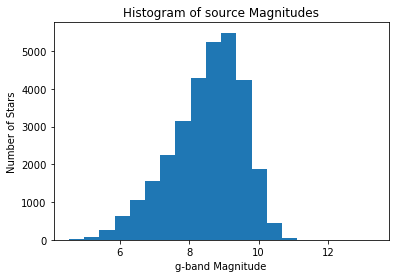

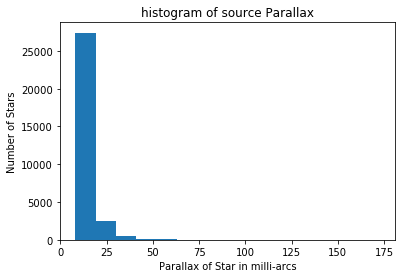

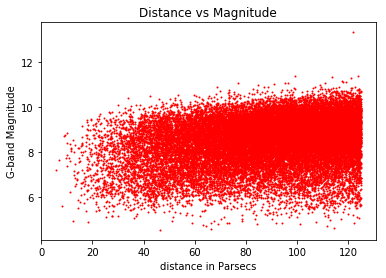

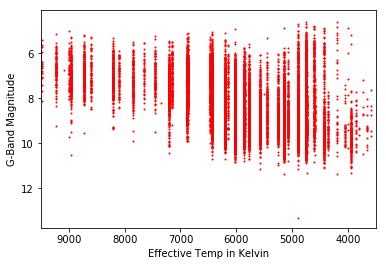

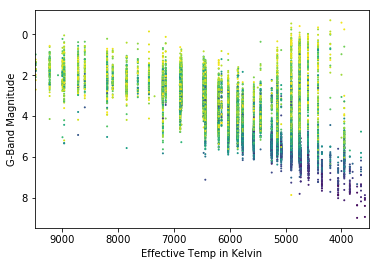

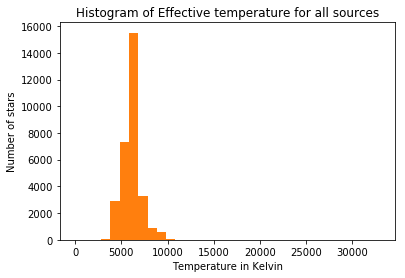

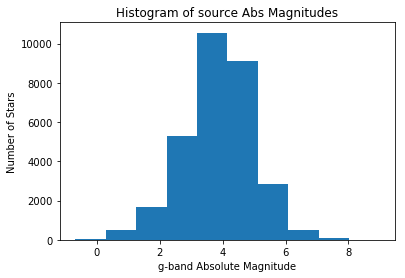

In [72]:
mags = t["__Gmag_"]

bins = 20
plt.xlabel("g-band Magnitude")
plt.ylabel("Number of Stars")
plt.title("Histogram of source Magnitudes")
plmags=plt.hist(mags,bins)
plt.show()

para = t["Plx"]

bins = 15
plt.xlabel("Parallax of Star in milli-arcs")
plt.ylabel("Number of Stars")
plt.title("histogram of source Parallax")
plpara=plt.hist(para,bins)
plt.show()

dist = 1000/para
plt.xlabel('distance in Parsecs')
plt.ylabel('G-band Magnitude')
plt.title('Distance vs Magnitude')
plt.scatter(dist,mags,s=1.0,c='r')
plt.show()

teff = t["Teff"]
#Teff vs Apparent Magnitude
plt.xlabel('Effective Temp in Kelvin')
plt.ylabel('G-Band Magnitude')
plt.scatter(teff,mags,s=1.0,c='r')
plt.xlim(3500,9500)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

absMags = mags - (5*np.log10(dist/10))
#Teff vs Absolute Magnitude
plt.xlabel('Effective Temp in Kelvin')
plt.ylabel('G-Band Magnitude')
plt.scatter(teff,absMags, s=1.0,c=dist)
plt.xlim(3500,9500)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

bins =20
plt.xlabel('Absolute Magnitude in G-band')
plt.ylabel('Number of Stars')
plt.title('Histogram of source Absolute Mag')
plabsmag=plt.hist(absMags,bins)

bins=30
plt.xlabel('Temperature in Kelvin')
plt.ylabel('Number of stars')
plt.title('Histogram of Effective temperature for all sources')
plteff=plt.hist(teff,bins)
plt.show()

bins = 10
plt.xlabel("g-band Absolute Magnitude")
plt.ylabel("Number of Stars")
plt.title("Histogram of source Abs Magnitudes")
plmags=plt.hist(absMags,bins)
plt.show()




In [2]:
from astropy.table import Table
t = Table.read('TGAS_d125_Wright03_2Mass', format='votable')

print(t.colnames)

['d_arcsec', '_2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000_2', 'DEJ2000_2', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType']


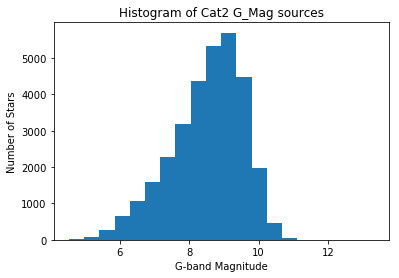

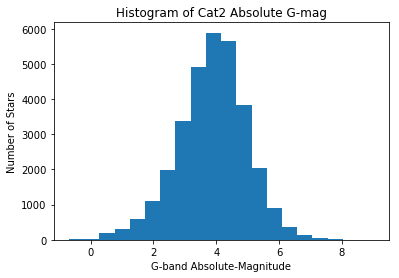

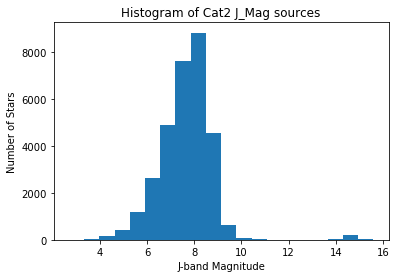

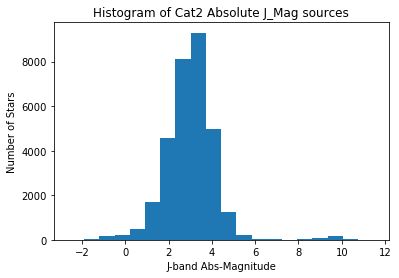

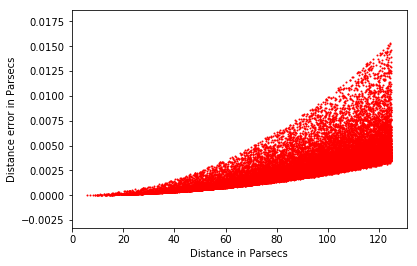

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


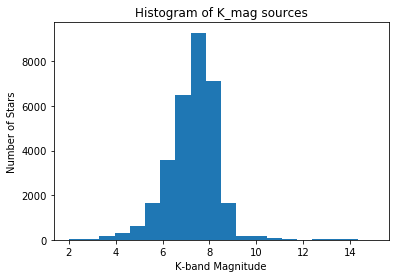

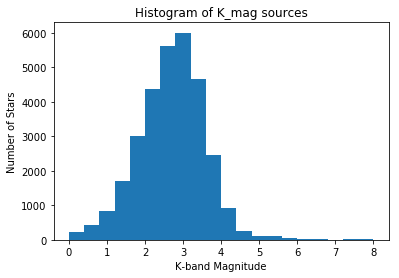

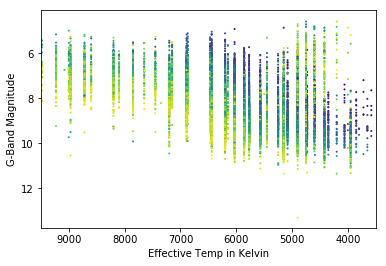

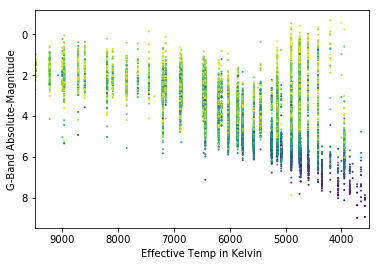

In [37]:
#Catalog 2: TGAS_d125_Wright03_2Mass
Jmag = t["Jmag"]
Kmag = t["Kmag"]
Gmag = t["__Gmag_"]
Plx = t["Plx"]
dist = 1000/Plx
Jmag_abs = Jmag - (5*np.log10(dist/10))
Kmag_abs = Kmag - (5*np.log10(dist/10))
Gmag_abs = Gmag - (5*np.log10(dist/10))


bins = 20
plt.xlabel("G-band Magnitude")
plt.ylabel("Number of Stars")
plt.title("Histogram of Cat2 G_Mag sources")
plmags=plt.hist(Gmag,bins)
plt.show()

bins = 20
plt.xlabel("G-band Absolute-Magnitude")
plt.ylabel("Number of Stars")
plt.title("Histogram of Cat2 Absolute G-mag")
plabsmags=plt.hist(Gmag_abs,bins)
plt.show()

bins = 20
plt.xlabel("J-band Magnitude")
plt.ylabel("Number of Stars")
plt.title("Histogram of Cat2 J_Mag sources")
plmags=plt.hist(Jmag,bins)
plt.show()

bins = 20
plt.xlabel("J-band Abs-Magnitude")
plt.ylabel("Number of Stars")
plt.title("Histogram of Cat2 Absolute J_Mag sources")
plmags=plt.hist(Jmag_abs,bins)
plt.show()

#distance vs error in distance
#Something is not completely right with my plot, will need to take a closer look
Plx_error = t["e_Plx"]/1000
dist_err = np.sqrt(np.power((1000/(np.power(Plx,2))),2)*np.power(Plx_error,2))

plt.xlabel("Distance in Parsecs")
plt.ylabel("Distance error in Parsecs")
plt.scatter(dist,dist_err,s=1.0,c='red')
plt.show()

bins = 20
plt.xlabel("K-band Magnitude")
plt.ylabel("Number of Stars")
plt.title("Histogram of K_mag sources")
plmags=plt.hist(Kmag,bins,range=(2,15))
#plmags=plt.hist(Kmag,bins[1.819,15.105])
plt.show()

bins = 20
plt.xlabel("K-band Magnitude")
plt.ylabel("Number of Stars")
plt.title("Histogram of K_mag sources")
plmags=plt.hist(Kmag_abs,bins,range=(0,8))
#plmags=plt.hist(Kmag,bins[1.819,15.105])
plt.show()

Teff = t["Teff"]

plt.xlabel('Effective Temp in Kelvin')
plt.ylabel('G-Band Magnitude')
plt.scatter(Teff,Gmag,s=1.0,c=dist)
plt.xlim(3500,9500)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

plt.xlabel('Effective Temp in Kelvin')
plt.ylabel('G-Band Absolute-Magnitude')
plt.scatter(Teff,Gmag_abs,s=1.0,c=dist)
plt.xlim(3500,9500)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()



In [68]:
from astropy.table import Table
t = Table.read('TGAS_d125_Wright03_2Mass', format='votable')
print(t.colnames)
import copy

Jmag = t['Jmag']
J_mag = (copy.copy(Jmag))
Gmag = t['__Gmag_']
G_mag = np.array(copy.copy(Gmag))
Hmag = t['Hmag']
H_mag = np.array(copy.copy(Hmag))
Kmag = t['Kmag']
K_mag = np.array(copy.copy(Kmag))

Qfl=t['Qfl']
Flag = (copy.copy(t['Qfl']))
#Flag = list(map(int,Flag))
J_mask = []

for c in J_mag:
    if Flag[m]=="AAA":
        value= J_mag[c]
        np.append(J_mask,value)
#FlagAAA = (Flag=="AAA")
#print(FlagAAA)
#J_mask = J_mag[FlagAAA]
#print(J_mask)
#max1 = max(J_mask)
#print(max1)        
        

JG = J_mag - G_mag
HK = H_mag - K_mag



plt.title("J-G vs H-K")
plt.xlabel("J-G Magnitude")
plt.ylabel("H-K Magnitude")
plt.scatter(JG,HK,s=1.0,c='r')
plt.show()



['d_arcsec', '_2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000_2', 'DEJ2000_2', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType']


NameError: name 'm' is not defined

In [31]:
from astropy.table import Table
t = Table.read('TGAS_d125_Wright03_2Mass', format='votable')
print(t.colnames)
import copy

Qfl = t['Qfl']
print(Qfl)

WARNING

['d_arcsec', '_2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000_2', 'DEJ2000_2', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType']
Qfl
---
AAA
AAA
AAA
AAA
AAA
DDD
AAA
AAA
AAA
AAA
...
AAA
AAA
AAA
AAA
AAA
AAA
AAA
AAA
AAA
AAA
AAA
Length = 31437 rows


: W49: TGAS_d125_Wright03_2Mass:63:318: W49: Empty cell illegal for integer fields. [astropy.io.votable.converters]
